# ENSEMBLE TECHNIQUES PROJECT

### - Author - Manoj Mariappan 

## 1. Importing required libraries

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree,metrics
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier,RandomForestClassifier
from sklearn.metrics import classification_report,roc_auc_score,roc_curve,auc
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

## 2. Reading the Data into the Dataframe

In [2]:
BankData = pd.read_csv("Data/bank-full.csv")
BankData.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


#### - The data as per seen from above it has a few numeric and string data types which in some way can come under categorical values such as education , job, month, housing and so.

## 3. EDA
### 3.a. Shape of the data

In [3]:
print("Number of records and features in the Data",BankData.shape)
print("<==========================================================>")

Number of records and features in the Data (45211, 17)
<==========================================================>


- The data has 45211 Records with 17 attributes. 

### 3.b. Data Type of each Attribute

In [4]:
print("Datatypes of the DataFrame")
print(BankData.dtypes)

Datatypes of the DataFrame
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object


#### -7 integer type and 10 object type(Strings in the column)
1.  Age is the age of the person it is of integer type
2.  job is the type of job the person is in and it comes under categorical type of data
3.  marital is the marital status of the person and it comes under categorical type
4.  education is the education qualification of the person and this comes under categorical value.
5.  default is if the person has credit or not and comes under categorucal type
6.  balance is the average yearly balance in the account of the person and its of numerical type
7.  housing is if the person has housing loan or not and it comes under categorical type
8.  Loan is if the person has personal loan or not and it too comes under categorical type
9.  contact is what contact type the person has it comes under categorical type too
10. day is the last day of contact of the person from the bank it comes under numerical type
11. month is the last contact month in the year it is a categorical type
12. duration is the duration of the last contact its of numerical type
13. campaign is a numeric type defines how many times the person is contacted
14. pdays is how many days has crossed since the contact from the previous campaign and its numeric type
15. previous is how many times the person is contacted before and its numeric type
16. poutcome is the outcome of the previous campaign and its a categorical type
17. is the target of the record if he subscribed or not this is also a categorical type

### 3.c. Finding Missing Values

Lets check for the missing Values in the Data

In [5]:
BankData.isna().apply(pd.value_counts)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
False,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211


##### -There are no null or missing values in any of the columns
There are 45211 total number of records. All the attributed of the datas are shown above and they have no null values

### 3.d. 5 point summary of the Data

In [6]:
BankData.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


- Age has mean and 50% very close, so this seems to be a normally distributed data.
- Balance seems to be on the negative end too. since it goes beyond the average negative value. The mean and 50% is different so this feature is skewed.
- day looks like normally distributed
- pdays has -1 from min to 75% and since it denotes people who were not concated on the previous campaign.
- previous 0 seems to be filled mostly in the feature since min to 75% has 0 this denotes the person has not been contacted yet before this campaign.

Now let us see the information on each categorical variable how many types of category they have and how many values each type has
<=========================================================================>
The Distribution of job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
<===============================>
The Distribution of marital
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
AxesSubplot(0.125,0.125;0.352273x0.755)
AxesSubplot(0.547727,0.125;0.352273x0.755)


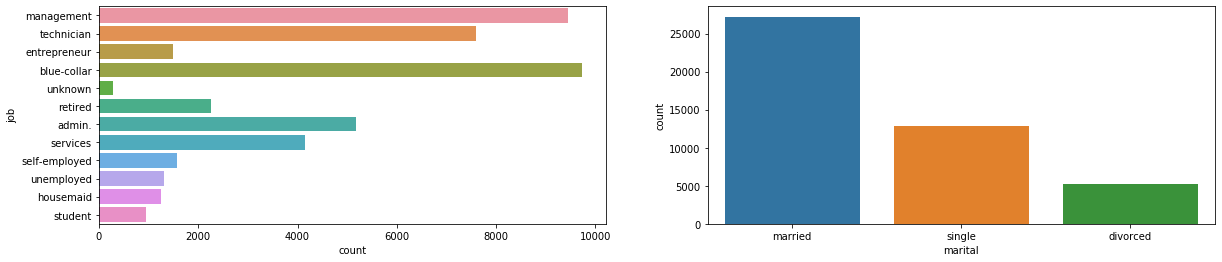

In [7]:
job = BankData["job"].value_counts()
marital = BankData["marital"].value_counts()
education = BankData["education"].value_counts()
default = BankData["default"].value_counts()
housing = BankData["housing"].value_counts()
loan = BankData["loan"].value_counts()
contact = BankData["contact"].value_counts()
month = BankData["month"].value_counts()
poutcome = BankData["poutcome"].value_counts()
Target = BankData["Target"].value_counts()

print("Now let us see the information on each categorical variable how many types of category they have and how many values each type has")
print("<=========================================================================>")
print("The Distribution of job")
print(job)
print("<===============================>")
print("The Distribution of marital")
print(marital)

fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
print(sns.countplot(y='job',data=BankData,ax = ax1))
print(sns.countplot(x='marital',data=BankData,ax = ax2))

- the feature job shows that the highest count is from management and bluecollar while the lowest fall under unknown category. The category unknown will not be replaced since it will be hard to categorise and it can be left out as a seperate attribute to the feature
- The marital feature shows married men to be the highest on the data while divorced is the lowest of the three categories

<===============================>
The Distribution of education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
<===============================>
The Distribution of default
no     44396
yes      815
Name: default, dtype: int64
AxesSubplot(0.125,0.125;0.352273x0.755)
AxesSubplot(0.547727,0.125;0.352273x0.755)


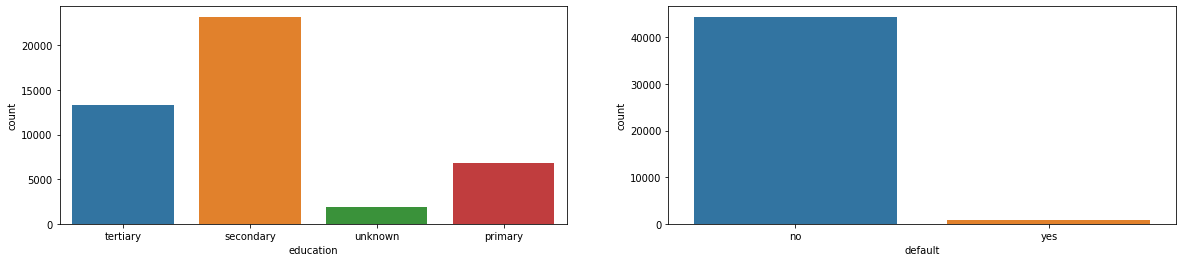

In [8]:
print("<===============================>")
print("The Distribution of education")
print(education)
print("<===============================>")
print("The Distribution of default")
print(default)

fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
print(sns.countplot(x='education',data=BankData,ax = ax1))
print(sns.countplot(x='default',data=BankData,ax = ax2))

- people with the secondary education seems to fill the most while unknown is to be the least.
- the people who dosent have credit in default is the most on the data

<===============================>
The Distribution of housing
yes    25130
no     20081
Name: housing, dtype: int64
<===============================>
The Distribution of loan
no     37967
yes     7244
Name: loan, dtype: int64
AxesSubplot(0.125,0.125;0.352273x0.755)
AxesSubplot(0.547727,0.125;0.352273x0.755)


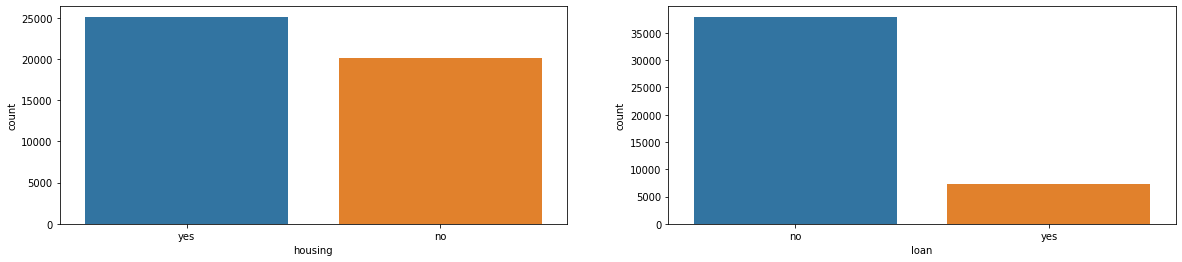

In [9]:
print("<===============================>")
print("The Distribution of housing")
print(housing)
print("<===============================>")
print("The Distribution of loan")
print(loan)
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
print(sns.countplot(x='housing',data=BankData,ax = ax1))
print(sns.countplot(x='loan',data=BankData,ax = ax2))

- people who have housing loand seems to be very closely matched to the ones who dosent have housing loans.
- people who dosent have personal loan seems to be highest covered in the data

<===============================>
The Distribution of contact
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64
<===============================>
The Distribution of month
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64
AxesSubplot(0.125,0.125;0.352273x0.755)
AxesSubplot(0.547727,0.125;0.352273x0.755)


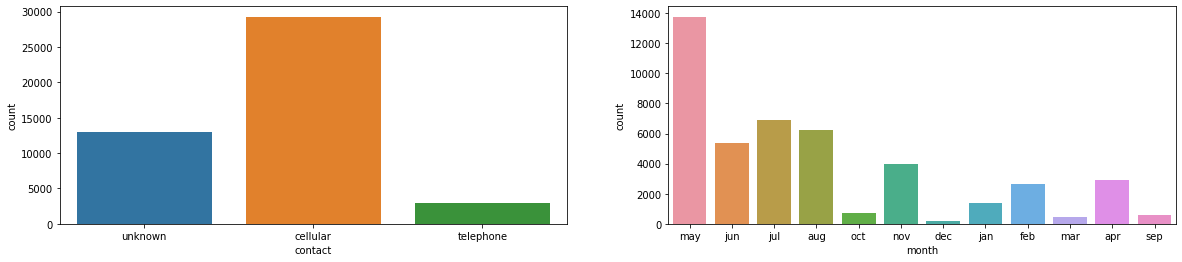

In [10]:
print("<===============================>")
print("The Distribution of contact")
print(contact)
print("<===============================>")
print("The Distribution of month")
print(month)
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
print(sns.countplot(x='contact',data=BankData,ax = ax1))
print(sns.countplot(x='month',data=BankData,ax = ax2))

- people who were has the contact type cellular is the highest.
- while the data seems to have the been contacted mostly during the month of may

<===============================>
The Distribution of poutcome
unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64
<===============================>
The Distribution of Target
no     39922
yes     5289
Name: Target, dtype: int64
AxesSubplot(0.125,0.125;0.352273x0.755)
AxesSubplot(0.547727,0.125;0.352273x0.755)


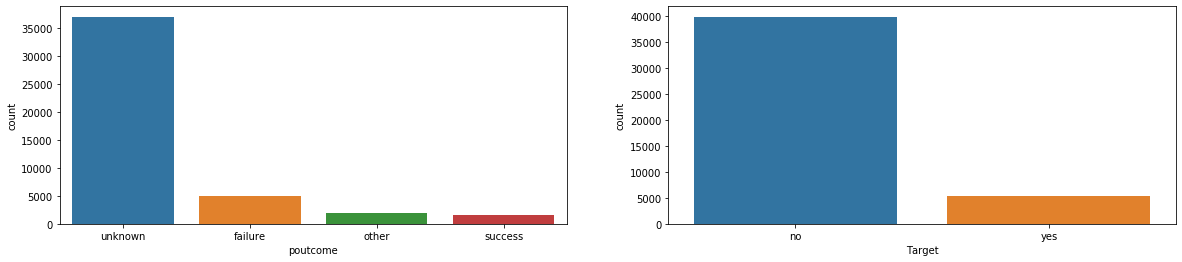

In [11]:
print("<===============================>")
print("The Distribution of poutcome")
print(poutcome)
print("<===============================>")
print("The Distribution of Target")
print(Target)

fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
print(sns.countplot(x='poutcome',data=BankData,ax = ax1))
print(sns.countplot(x='Target',data=BankData,ax = ax2))

- outcome is unknown for most of the data from the previous campaign
- The Target variable seems to be distributed for no and yes seems to be covering less samples. so there may arise a problem with accuracy on the Target value yes while modeling

#### Feature   ========================    Number of Categories
1. job ================================= 12
2. marital ============================== 3
3. education ============================ 4
4. default ============================== 2
5. housing ============================= 2
6. loan ================================ 2
7. contact ============================== 3
8. month ============================== 12
9. poutcome ============================ 4
10. Target =============================== 2

### 3.e. Checking for presence of outliers

Each numerical feature will be checked for the presence of ourliers with the visualization(boxplot and distplot) and calcualting the outliers with upper limit and lower limit using the IQR

upper limit :  70.5
Total number of outliers present in the feature age is 487


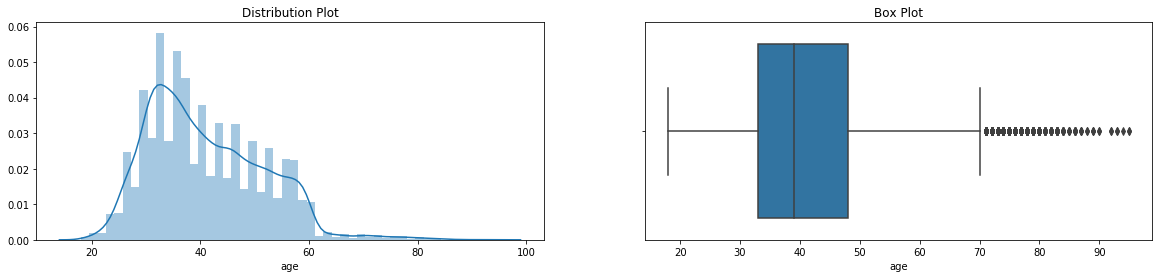

In [12]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(BankData['age'],ax=ax1)
ax1.set_title("Distribution Plot")
sns.boxplot(BankData['age'],ax=ax2)
ax2.set_title("Box Plot")

Q1 = np.percentile(a = BankData['age'], q = 25)
Q3 = np.percentile(a = BankData['age'], q = 75)
IQR = Q3 - Q1
ul = Q3 + (1.5 * IQR)
ll = Q1 - (1.5 * IQR)
total = len(BankData[(BankData['age']>ul) | (BankData['age'] < ll) ])
print("upper limit : ", ul)
print("Total number of outliers present in the feature age is " + str(total))

Lower limit :  -1962.0
upper limit :  3462.0
Total number of outliers present in the feature balance is 4729


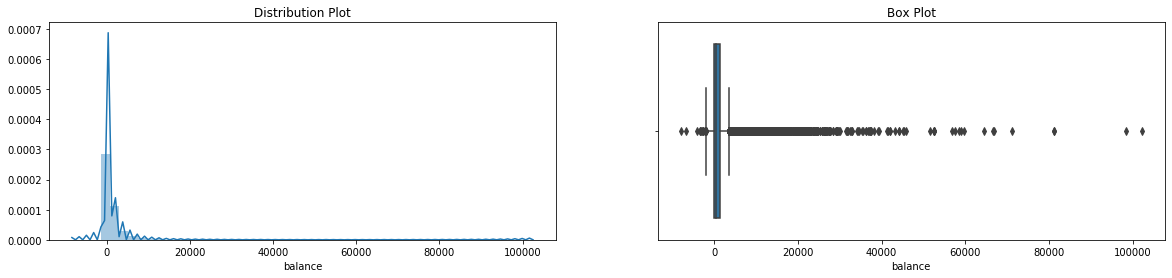

In [13]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(BankData['balance'],ax=ax1)
ax1.set_title("Distribution Plot")
sns.boxplot(BankData['balance'],ax=ax2)
ax2.set_title("Box Plot")

Q1 = np.percentile(a = BankData['balance'], q = 25)
Q3 = np.percentile(a = BankData['balance'], q = 75)
IQR = Q3 - Q1
ul = Q3 + (1.5 * IQR)
ll = Q1 - (1.5 * IQR)
total = len(BankData[(BankData['balance']>ul) | (BankData['balance'] < ll) ])
print("Lower limit : ",ll)
print("upper limit : ",ul)
print("Total number of outliers present in the feature balance is " + str(total))

Total number of outliers present in the feature day is 0


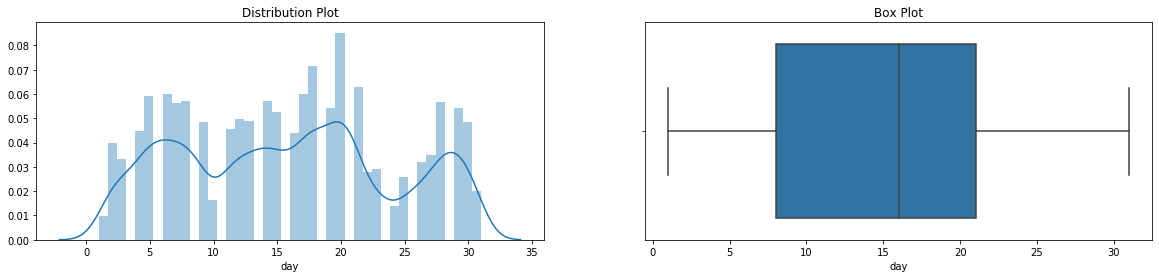

In [14]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(BankData['day'],ax=ax1)
ax1.set_title("Distribution Plot")
sns.boxplot(BankData['day'],ax=ax2)
ax2.set_title("Box Plot")

Q1 = np.percentile(a = BankData['day'], q = 25)
Q3 = np.percentile(a = BankData['day'], q = 75)
IQR = Q3 - Q1
ul = Q3 + (1.5 * IQR)
ll = Q1 - (1.5 * IQR)
total = len(BankData[(BankData['day']>ul) | (BankData['day'] < ll) ])

print("Total number of outliers present in the feature day is " + str(total))

Lower limit :  -2.0
Upper limit :  6.0
Total number of outliers present in the feature campaign is 3064


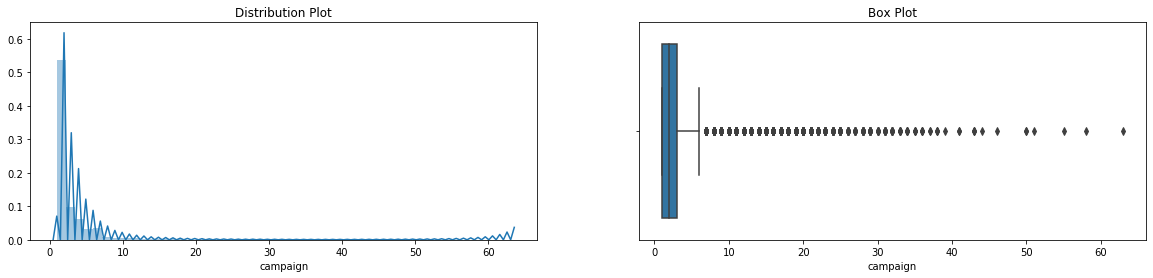

In [15]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(BankData['campaign'],ax=ax1)
ax1.set_title("Distribution Plot")
sns.boxplot(BankData['campaign'],ax=ax2)
ax2.set_title("Box Plot")

Q1 = np.percentile(a = BankData['campaign'], q = 25)
Q3 = np.percentile(a = BankData['campaign'], q = 75)
IQR = Q3 - Q1
ul = Q3 + (1.5 * IQR)
ll = Q1 - (1.5 * IQR)
total = len(BankData[(BankData['campaign']>ul) | (BankData['campaign'] < ll) ])
print("Lower limit : ", ll)
print("Upper limit : ",ul)
print("Total number of outliers present in the feature campaign is " + str(total))

upper limit :  -1.0
lower limit :  -1.0
Total number of outliers present in the feature pdays is 8257


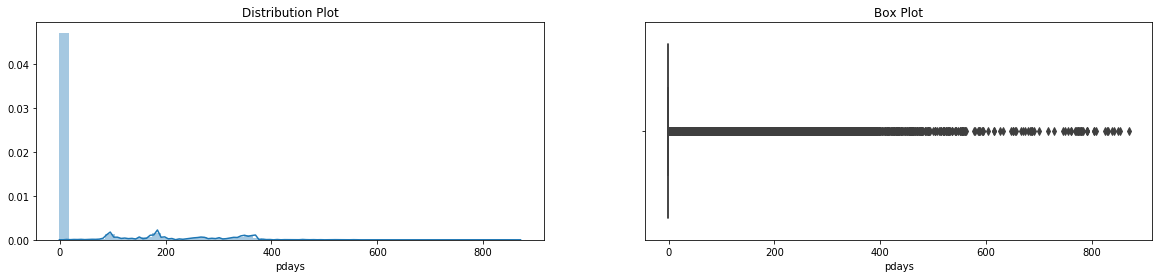

In [16]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(BankData['pdays'],ax=ax1)
ax1.set_title("Distribution Plot")
sns.boxplot(BankData['pdays'],ax=ax2)
ax2.set_title("Box Plot")

Q1 = np.percentile(a = BankData['pdays'], q = 25)
Q3 = np.percentile(a = BankData['pdays'], q = 75)
IQR = Q3 - Q1
ul = Q3 + (1.5 * IQR)
ll = Q1 - (1.5 * IQR)
total = len(BankData[(BankData['pdays']>ul) | (BankData['pdays'] < ll) ])
print("upper limit : ", ul)
print("lower limit : ", ll)
print("Total number of outliers present in the feature pdays is " + str(total))

Total number of outliers present in the feature previous is 8257


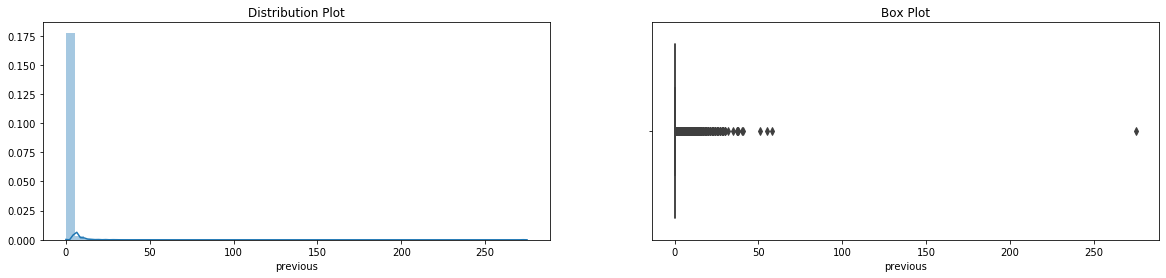

In [17]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(BankData['previous'],ax=ax1)
ax1.set_title("Distribution Plot")
sns.boxplot(BankData['previous'],ax=ax2)
ax2.set_title("Box Plot")

Q1 = np.percentile(a = BankData['previous'], q = 25)
Q3 = np.percentile(a = BankData['previous'], q = 75)
IQR = Q3 - Q1
ul = Q3 + (1.5 * IQR)
ll = Q1 - (1.5 * IQR)
total = len(BankData[(BankData['previous']>ul) | (BankData['previous'] < ll) ])

print("Total number of outliers present in the feature previous is " + str(total))

- The feature "age" has the upper limit around 70.5. So the upper limit in the data will be changed to 71 and all the values above 71 will be replaced with 71.
- The feature "balance" has the lower limit of -1962 and the upper limit of 3462. For this feature the lower limit will be replaced with -2000 as the lowest limit and all the values below -2000 will be replaced with -2000. For the upper limit outlier capping will be used.
- The feature "day" dosent have any outliers.
- The feature "campaign" has the lower limit -2 but minimum value in the dataset is 1 which doesnt need any replacement. The upper limit will be replaced based on outlier capping.
- "previous" and "pdays" have the highest number of outliers and that is almost 20% of the actual data. simply removing the outliers will lead us to loss of data. These two features have equal number of outliers. For these 2 features 

There are lot of outliers and the data of those outliers seems to be legit information at times and removing them will be giving us a huge information loss. Due to this reason i am not removing the outliers.

Instead of removing the outliers "Outlier capping" method is going to be used below using percentile calculation
##### now lets go for handling the outliers

In [18]:
# The feature "age" is going to be capped for 70 the values above 70 in age will be replaced by 70
BankData['age'][BankData['age']>71] = 71

In [19]:
print(BankData['balance'].quantile(.95))

5768.0


In [20]:
# The feature "balance" im replacing the upper 5% of the data with 95th percentile
BankData['balance'][BankData['balance']>BankData['balance'].quantile(0.95)] = BankData['balance'].quantile(.95)

In [21]:
# in the feature "balance" the lower limit is set to -2000 and those below that walue are replaced with -2000"
BankData['balance'][BankData['balance']<-2000] = -2000

In [22]:
print(BankData['campaign'].quantile(.95))

8.0


In [23]:
# The feature "campaign" im replacing the upper 5% of the data with 90th percentile 
#i checked with 10% but it seems to affect the real data a lot even after outliers
BankData['campaign'][BankData['campaign']>BankData['campaign'].quantile(0.95)] = BankData['campaign'].quantile(.95)

In [24]:
print(BankData['pdays'].quantile(.90))

185.0


In [25]:
# The feature pdays im replacing the upper 10% of the data with 90th percentile
BankData['pdays'][BankData['pdays']>BankData['pdays'].quantile(0.90)] = BankData['pdays'].quantile(.90)

In [26]:
print(BankData['previous'].quantile(.95))

3.0


In [27]:
# The feature previous im replacing the upper 5% of the data with 95th percentile 
#since 90% is just 2 which gives a very narrow margin
BankData['previous'][BankData['previous']>BankData['previous'].quantile(0.95)] = BankData['previous'].quantile(.95)

In [28]:
BankData.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.873571,1101.992546,15.806419,258.163080,2.511513,27.932605,0.378691
std,10.410365,1596.411288,8.322476,257.527812,1.905038,64.036866,0.881417
min,18.000000,-2000.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,71.000000,5768.000000,31.000000,4918.000000,8.000000,185.000000,3.000000


Now let view how the data looks like after the outliers have been handled. If we notice we can find that the upper limits of the features"age", "balance", "campaign", "pdays", "previous" have been changed and lower limit of the balance have been changed too.

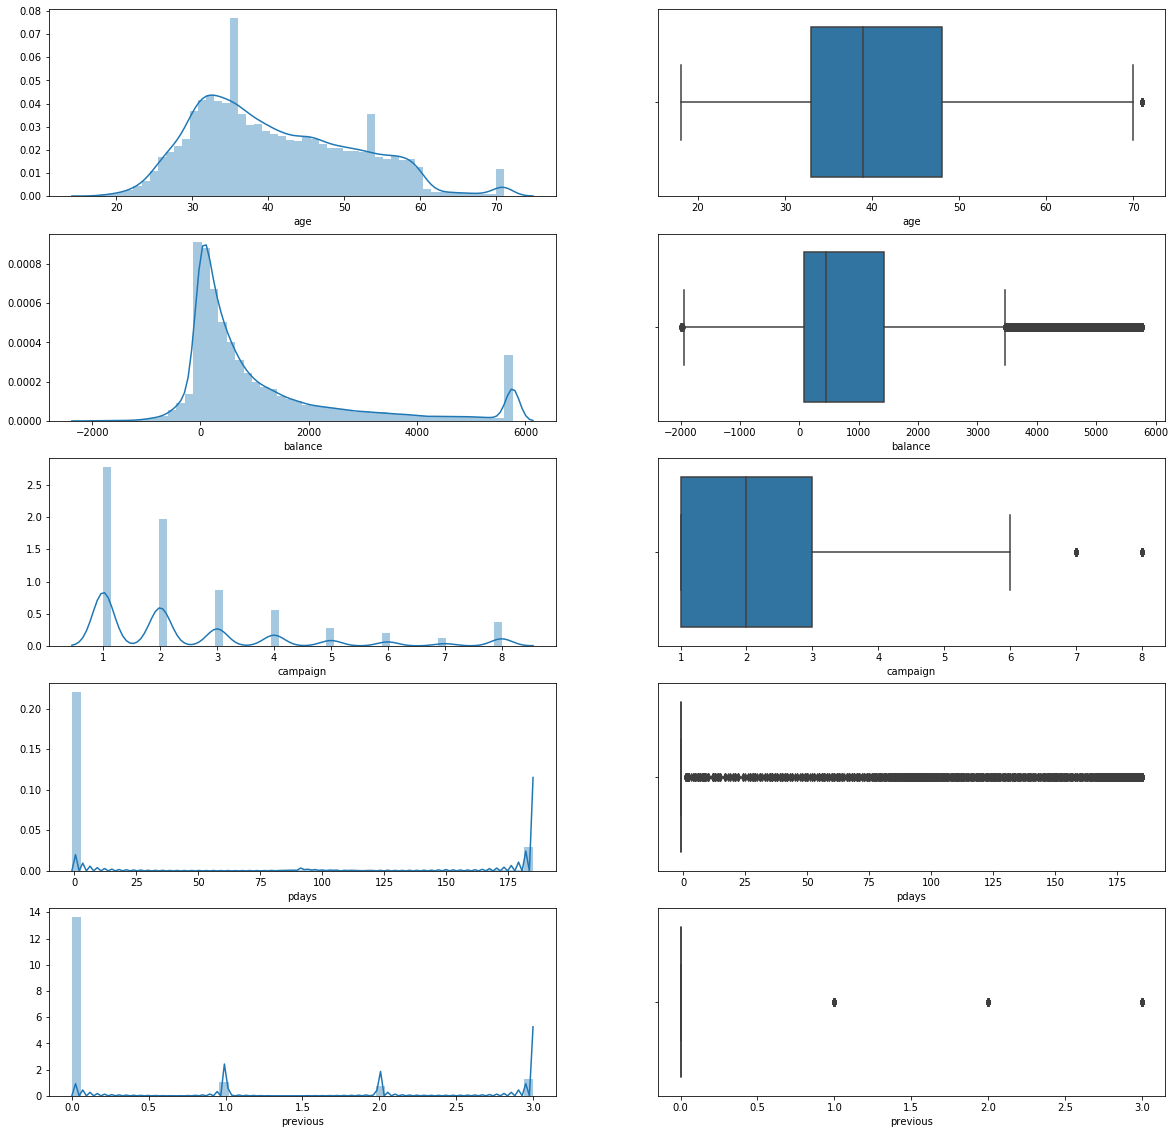

In [29]:
fig, ax = plt.subplots(nrows = 5, ncols = 2,figsize = (20,20))
#fig.set_size_inches(20,4)
sns.distplot(BankData['age'],ax=ax[0][0])
sns.boxplot(BankData['age'],ax=ax[0][1])
sns.distplot(BankData['balance'],ax=ax[1][0])
sns.boxplot(BankData['balance'],ax=ax[1][1])
sns.distplot(BankData['campaign'],ax=ax[2][0])
sns.boxplot(BankData['campaign'],ax=ax[2][1])
sns.distplot(BankData['pdays'],ax=ax[3][0])
sns.boxplot(BankData['pdays'],ax=ax[3][1])
sns.distplot(BankData['previous'],ax=ax[4][0])
sns.boxplot(BankData['previous'],ax=ax[4][1])
fig.show()

The Data after cleaning of outliers looks litte better and we will further process the data

###### Let us see the relation between the Numerical features

In [30]:
BankData.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.116642,-0.008866,-0.006466,0.022053,-0.009454,0.004295
balance,0.116642,1.000000,0.011349,0.036817,-0.023155,0.039024,0.051255
day,-0.008866,0.011349,1.000000,-0.030206,0.160417,-0.086856,-0.079935
duration,-0.006466,0.036817,-0.030206,1.000000,-0.074824,0.002633,0.006111
campaign,0.022053,-0.023155,0.160417,-0.074824,1.000000,-0.105458,-0.086830
pdays,-0.009454,0.039024,-0.086856,0.002633,-0.105458,1.000000,0.859795
previous,0.004295,0.051255,-0.079935,0.006111,-0.086830,0.859795,1.000000


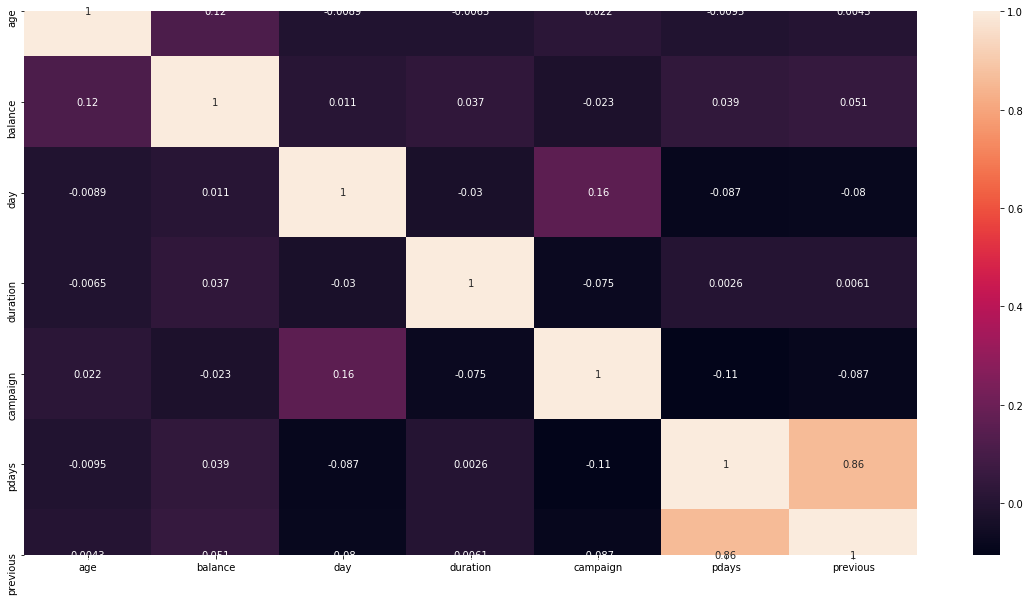

In [31]:
plt.figure(figsize = (20,10))
sns.heatmap(BankData.corr(),annot = True)
plt.show()

- pdays and previous seems to be highly corelated since they have the highest in the matrix which is .86
- duration is least corelated to pdays which is very low.
- duration and day is negatively co related same for pdays and day. but campaign and pdays has the highest negative corealtion. 

## 4. Preparing the data to train the Models

Since the target will be known at the end of the call we will be dropping the column duration since we are making a model to predict the outcome.

In [32]:
BankData = BankData.drop("duration",axis = 1)
BankData.shape

(45211, 16)

Now the First step in preparing the data is how we are going to handle the Categorical data.
- converting all the object type to categorical datatype

In [33]:
for feature in BankData.columns:
    if BankData[feature].dtype == 'object':
                BankData[feature] = pd.Categorical(BankData[feature])
BankData.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,1,-1,0,unknown,no


Label encoding will be used for the categories which has more than 3 types of values

#### Label encoding
##### job, education, month, poutcome  and target
These are having label encoding for their specific values because they have multiple categories within them if one hot encoding is done the size of the features will explode and the data becomes cumbersome so label encoding is done for them

the features 'job', 'education', 'month', 'poutcome', 'Target' will be label encoded with different numerical values.

In [34]:
lable_replace = {
    'job': {'admin.' : 1,'blue-collar' : 2,'entrepreneur' : 3, 'housemaid' : 4,'management' : 5,'retired' :6, 'self-employed' : 7,'services' : 8,'student' : 9,'technician' : 10, 'unemployed' : 11, 'unknown' : -1},
    'education' : {'primary' : 1, 'secondary' : 2, 'tertiary' : 3, 'unknown' : -1},    
    'month' : { 'jan' : 1, 'feb' : 2, 'mar' : 3, 'apr' : 4, 'may' : 5 ,'jun' : 6, 'jul' : 7, 'aug' : 8, 'sep' : 9 , 'oct' : 10,'nov' : 11, 'dec' : 12},
    'poutcome' : {'failure' : 1 , 'other' : 2, 'success' : 3, 'unknown' : -1},
    'Target' : { 'no' : 0, 'yes' : 1}
}
BankData=BankData.replace(lable_replace)
BankData.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,Target
0,58,5,married,3,no,2143,yes,no,unknown,5,5,1,-1,0,-1,0
1,44,10,single,2,no,29,yes,no,unknown,5,5,1,-1,0,-1,0
2,33,3,married,2,no,2,yes,yes,unknown,5,5,1,-1,0,-1,0
3,47,2,married,-1,no,1506,yes,no,unknown,5,5,1,-1,0,-1,0
4,33,-1,single,-1,no,1,no,no,unknown,5,5,1,-1,0,-1,0
5,35,5,married,3,no,231,yes,no,unknown,5,5,1,-1,0,-1,0
6,28,5,single,3,no,447,yes,yes,unknown,5,5,1,-1,0,-1,0
7,42,3,divorced,3,yes,2,yes,no,unknown,5,5,1,-1,0,-1,0
8,58,6,married,1,no,121,yes,no,unknown,5,5,1,-1,0,-1,0
9,43,10,single,2,no,593,yes,no,unknown,5,5,1,-1,0,-1,0


#### One Hot encoding
##### marital, default, housing, loan, contact
These features has undergone one hot encoding since the outcome of default, housing and loan are of yes or no type.
marital and contact has just 3 features and are very simple

Next part is one hot encoding of the features which has 3 or less than 3 values

In [35]:
BankData = pd.get_dummies(BankData, columns = ['marital','default','housing','loan','contact'],drop_first = True)
BankData.head(10)

,age,job,education,balance,day,month,campaign,pdays,previous,poutcome,Target,marital_married,marital_single,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown
0,58,5,3,2143,5,5,1,-1,0,-1,0,1,0,0,1,0,0,1
1,44,10,2,29,5,5,1,-1,0,-1,0,0,1,0,1,0,0,1
2,33,3,2,2,5,5,1,-1,0,-1,0,1,0,0,1,1,0,1
3,47,2,-1,1506,5,5,1,-1,0,-1,0,1,0,0,1,0,0,1
4,33,-1,-1,1,5,5,1,-1,0,-1,0,0,1,0,0,0,0,1
5,35,5,3,231,5,5,1,-1,0,-1,0,1,0,0,1,0,0,1
6,28,5,3,447,5,5,1,-1,0,-1,0,0,1,0,1,1,0,1
7,42,3,3,2,5,5,1,-1,0,-1,0,0,0,1,1,0,0,1
8,58,6,1,121,5,5,1,-1,0,-1,0,1,0,0,1,0,0,1
9,43,10,2,593,5,5,1,-1,0,-1,0,0,1,0,1,0,0,1


After one hot encoding we can notice 2 more extra feature is added.

In [36]:
BankData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
age                  45211 non-null int64
job                  45211 non-null int64
education            45211 non-null int64
balance              45211 non-null int64
day                  45211 non-null int64
month                45211 non-null int64
campaign             45211 non-null int64
pdays                45211 non-null int64
previous             45211 non-null int64
poutcome             45211 non-null int64
Target               45211 non-null int64
marital_married      45211 non-null uint8
marital_single       45211 non-null uint8
default_yes          45211 non-null uint8
housing_yes          45211 non-null uint8
loan_yes             45211 non-null uint8
contact_telephone    45211 non-null uint8
contact_unknown      45211 non-null uint8
dtypes: int64(11), uint8(7)
memory usage: 4.1 MB


Now all the features are of numerical type and will be easy for modelling

#### Lets See the Relation of all the features

In [37]:
BankData.corr()

,age,job,education,balance,day,month,campaign,pdays,previous,poutcome,Target,marital_married,marital_single,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown
age,1.000000,-0.039507,-0.163148,0.116642,-0.008866,0.093595,0.022053,-0.009454,0.004295,0.004749,0.019480,0.290762,-0.432856,-0.017422,-0.182671,-0.013352,0.161656,-0.016708
job,-0.039507,1.000000,0.151021,0.020643,0.026436,0.040237,0.004267,-0.006564,0.004906,0.011379,0.040417,-0.098719,0.095339,-0.004753,-0.101812,-0.022945,-0.012440,-0.086248
education,-0.163148,0.151021,1.000000,0.037739,0.018659,0.061910,0.003889,0.018391,0.033332,0.035317,0.041634,-0.110970,0.114576,-0.007522,-0.022908,0.014705,-0.071879,-0.119689
balance,0.116642,0.020643,0.037739,1.000000,0.011349,0.112403,-0.023155,0.039024,0.051255,0.059843,0.081336,0.032926,-0.013432,-0.104798,-0.077378,-0.112464,0.045802,-0.047576
day,-0.008866,0.026436,0.018659,0.011349,1.000000,0.101989,0.160417,-0.086856,-0.079935,-0.079728,-0.028348,0.007102,-0.007412,0.009424,-0.027982,0.011370,0.023652,-0.034103
month,0.093595,0.040237,0.061910,0.112403,0.101989,1.000000,0.059942,-0.086825,-0.048289,-0.045237,0.018717,0.062925,-0.068586,0.014989,-0.173887,0.021638,0.037628,-0.182490
campaign,0.022053,0.004267,0.003889,-0.023155,0.160417,0.059942,1.000000,-0.105458,-0.086830,-0.111229,-0.083463,0.044728,-0.037307,0.017202,-0.037839,0.004166,0.069289,-0.010100
pdays,-0.009454,-0.006564,0.018391,0.039024,-0.086856,-0.086825,-0.105458,1.000000,0.859795,0.885581,0.133966,-0.024627,0.026204,-0.035216,0.099279,-0.022866,0.019892,-0.278554
previous,0.004295,0.004906,0.033332,0.051255,-0.079935,-0.048289,-0.086830,0.859795,1.000000,0.869992,0.163192,-0.019773,0.024656,-0.036522,0.052550,-0.027723,0.028704,-0.264486
poutcome,0.004749,0.011379,0.035317,0.059843,-0.079728,-0.045237,-0.111229,0.885581,0.869992,1.000000,0.233024,-0.030772,0.036785,-0.039608,0.023012,-0.043037,0.025039,-0.276254


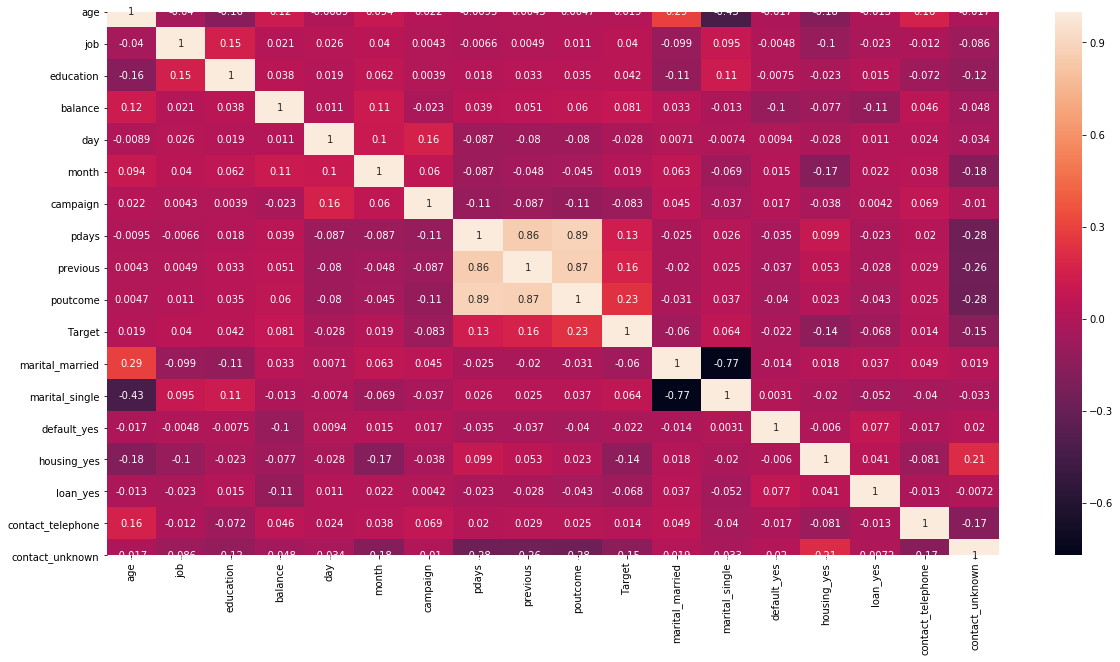

In [38]:
plt.figure(figsize = (20,10))
sns.heatmap(BankData.corr(),annot = True)
plt.show()

Before spliting of data the above heatmap and table shows how well the features are related to each other after label encoding is done for them.
- poutcome has the highest correlation with the Target followed by previous
- contact telephone has the least correlation with the Target

### Train-Test Split

In [39]:
X = BankData.drop("Target",axis = 1)
y = BankData.pop("Target")

print(y.head())
X.head()

0    0
1    0
2    0
3    0
4    0
Name: Target, dtype: int64


,age,job,education,balance,day,month,campaign,pdays,previous,poutcome,marital_married,marital_single,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown
0,58,5,3,2143,5,5,1,-1,0,-1,1,0,0,1,0,0,1
1,44,10,2,29,5,5,1,-1,0,-1,0,1,0,1,0,0,1
2,33,3,2,2,5,5,1,-1,0,-1,1,0,0,1,1,0,1
3,47,2,-1,1506,5,5,1,-1,0,-1,1,0,0,1,0,0,1
4,33,-1,-1,1,5,5,1,-1,0,-1,0,1,0,0,0,0,1


In [40]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.30,random_state = 5)
print("shape of the training data")
print(X_train.shape)
print("shape of the testing data")
print(X_test.shape)
print("<============================================>")
print("distribution of 1 and 0 in train set for the target variable")
print(y_train.value_counts())
print("distribution of 1 and 0 in test set for the target variable")
print(y_test.value_counts())

shape of the training data
(31647, 17)
shape of the testing data
(13564, 17)
<============================================>
distribution of 1 and 0 in train set for the target variable
0    27957
1     3690
Name: Target, dtype: int64
distribution of 1 and 0 in test set for the target variable
0    11965
1     1599
Name: Target, dtype: int64


The outcome of these targets are not evenly distributed and 0 has most number of values and its almost 85 percent on both of the Train and Test set

## 5. Standard Classification Algorithms
### a. Logistic Regression Classifier

In [41]:
LR = LogisticRegression()
LR = LR.fit(X_train,y_train)

# The accuracy score of both train and test data
print("Logistic Regression Model Train Accuracy: {0:.4f}".format(LR.score(X_train,y_train)))
print("Logistic Regression Model Test Accuracy : {0:.4f}".format(LR.score(X_test,y_test)))
print("<====================================================>")

# Classification report of Linear model
LR_predicted = LR.predict(X_test)
print(metrics.classification_report(y_test,LR_predicted))

Logistic Regression Model Train Accuracy: 0.8890
Logistic Regression Model Test Accuracy : 0.8882
<====================================================>
              precision    recall  f1-score   support

           0       0.90      0.99      0.94     11965
           1       0.62      0.13      0.22      1599

    accuracy                           0.89     13564
   macro avg       0.76      0.56      0.58     13564
weighted avg       0.86      0.89      0.86     13564



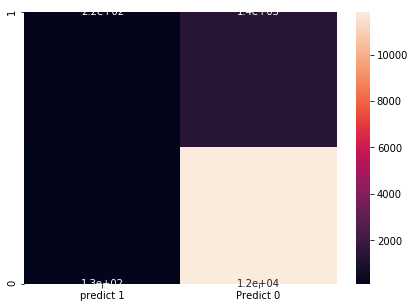

Confusion Matrix for Logistic Regression
[[  215  1384]
 [  133 11832]]


In [42]:
LR_CM = metrics.confusion_matrix(y_test,LR_predicted,labels=[1,0])
cm = pd.DataFrame(LR_CM,index = (i for i in ["1","0"]),
                     columns = (i for i in ["predict 1", "Predict 0"]))

plt.figure(figsize = (7,5))
sns.heatmap(cm,annot=True)
plt.show()

print("Confusion Matrix for Logistic Regression" )
print(LR_CM)

0.744889187166969


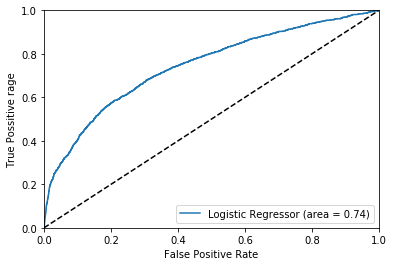

In [43]:
LR_ROC_AUC = roc_auc_score(y_test,LR.predict_proba(X_test)[:,1])
fpr_LR,tpr_LR, threshold_LR = roc_curve(y_test,LR.predict_proba(X_test)[:,1])
print(LR_ROC_AUC)

plt.figure()
plt.plot(fpr_LR,tpr_LR,label = "Logistic Regressor (area = %0.2f)" % LR_ROC_AUC)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.legend(loc= "lower right")
plt.xlabel("False Positive Rate")
plt.ylabel("True Possitive rage")
plt.show()

### b. KNN classifier

In [44]:
# for neighbors = 5 the model accuracy is 1 and it seems to overfit so i am trying neighbors = 10
KNN = KNeighborsClassifier(n_neighbors = 10 ,weights = 'distance')
KNN = KNN.fit(X_train,y_train)

#The accuracy for both train and test KNN model
print("KNN model Train Accuracy: {0:.4f}".format(KNN.score(X_train,y_train)))
print("KNN model Test Accuracy: {0:.4f}".format(KNN.score(X_test,y_test)))
print("<====================================================>")

KNN_predicted = KNN.predict(X_test)
print(metrics.classification_report(y_test,KNN_predicted))

KNN model Train Accuracy: 1.0000
KNN model Test Accuracy: 0.8837
<====================================================>
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     11965
           1       0.54      0.08      0.14      1599

    accuracy                           0.88     13564
   macro avg       0.72      0.54      0.54     13564
weighted avg       0.85      0.88      0.84     13564



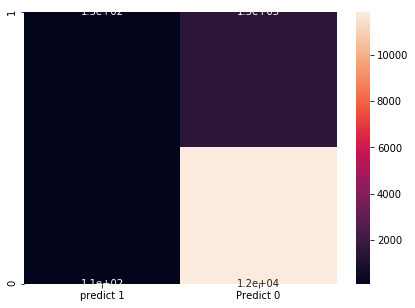

Confusion Matrix for KNN Model
[[  132  1467]
 [  111 11854]]


In [45]:
KNN_CM = metrics.confusion_matrix(y_test,KNN_predicted,labels=[1,0])
cm = pd.DataFrame(KNN_CM,index = (i for i in ["1","0"]),
                     columns = (i for i in ["predict 1", "Predict 0"]))

plt.figure(figsize = (7,5))
sns.heatmap(cm,annot=True)
plt.show()
print("Confusion Matrix for KNN Model")
print(KNN_CM)

0.6364010414992446


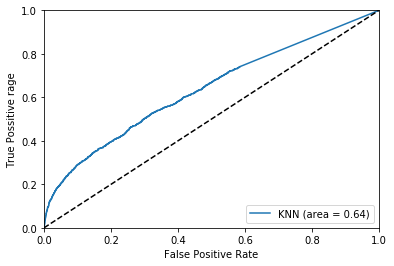

In [46]:
KNN_ROC_AUC = roc_auc_score(y_test,KNN.predict_proba(X_test)[:,1])
fpr_KNN,tpr_KNN, threshold_KNN = roc_curve(y_test,KNN.predict_proba(X_test)[:,1])
print(KNN_ROC_AUC)

plt.figure()
plt.plot(fpr_KNN,tpr_KNN,label = "KNN (area = %0.2f)" % KNN_ROC_AUC)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.legend(loc= "lower right")
plt.xlabel("False Positive Rate")
plt.ylabel("True Possitive rage")
plt.show()

### c. Naive Bayess Classifier

In [47]:
NaiveBayes_model = GaussianNB()
NaiveBayes_model.fit(X_train,y_train)

# Accuracy score of train and test model of Naive bayes model
print("Naive Bayes model Train Accuracy: {0:.4f}".format(NaiveBayes_model.score(X_train,y_train)))
print("Naive Bayes model Test Accuracy: {0:.4f}".format(NaiveBayes_model.score(X_test,y_test)))
print("<====================================================>")

NB_test_predict = NaiveBayes_model.predict(X_test)
print(metrics.classification_report(y_test,NB_test_predict))

Naive Bayes model Train Accuracy: 0.7913
Naive Bayes model Test Accuracy: 0.7901
<====================================================>
              precision    recall  f1-score   support

           0       0.91      0.84      0.88     11965
           1       0.25      0.39      0.30      1599

    accuracy                           0.79     13564
   macro avg       0.58      0.62      0.59     13564
weighted avg       0.83      0.79      0.81     13564



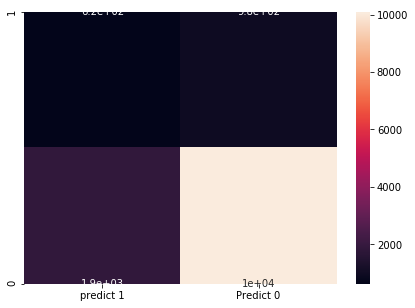

Confusion Matrix for Naive Bayes Model
[[  624   975]
 [ 1872 10093]]


In [48]:
NB_CM = metrics.confusion_matrix(y_test,NB_test_predict,labels=[1,0])
cm = pd.DataFrame(NB_CM,index = (i for i in ["1","0"]),
                     columns = (i for i in ["predict 1", "Predict 0"]))

plt.figure(figsize = (7,5))
sns.heatmap(cm,annot=True)
plt.show()
print("Confusion Matrix for Naive Bayes Model")
print(NB_CM)

0.7257376959638637


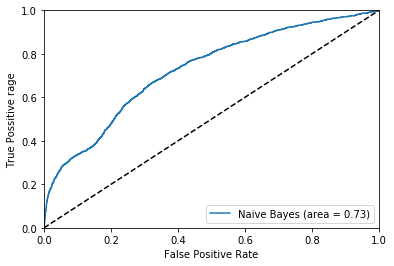

In [49]:
NB_ROC_AUC = roc_auc_score(y_test,NaiveBayes_model.predict_proba(X_test)[:,1])
fpr_NB,tpr_NB, threshold_NB = roc_curve(y_test,NaiveBayes_model.predict_proba(X_test)[:,1])
print(NB_ROC_AUC)

plt.figure()
plt.plot(fpr_NB,tpr_NB,label = "Naive Bayes (area = %0.2f)" % NB_ROC_AUC)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.legend(loc= "lower right")
plt.xlabel("False Positive Rate")
plt.ylabel("True Possitive rage")
plt.show()

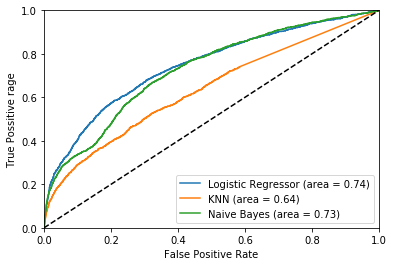

In [50]:
# Lets see all the curves in a single graph
plt.figure()
plt.plot(fpr_LR,tpr_LR,label = "Logistic Regressor (area = %0.2f)" % LR_ROC_AUC)
plt.plot(fpr_KNN,tpr_KNN,label = "KNN (area = %0.2f)" % KNN_ROC_AUC)
plt.plot(fpr_NB,tpr_NB,label = "Naive Bayes (area = %0.2f)" % NB_ROC_AUC)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.legend(loc= "lower right")
plt.xlabel("False Positive Rate")
plt.ylabel("True Possitive rage")
plt.show()

### d. SVC

In [51]:
SVC_model = SVC()
SVC_model = SVC_model.fit(X_train,y_train)

# Accuracy score of train and test model of SVC model
print("SVC model Train Accuracy: {0:.4f}".format(SVC_model.score(X_train,y_train)))
print("SVC model Test Accuracy: {0:.4f}".format(SVC_model.score(X_test,y_test)))
print("<====================================================>")

SVC_test_predict = SVC_model.predict(X_test)
print(metrics.classification_report(y_test,SVC_test_predict))

SVC model Train Accuracy: 0.9721
SVC model Test Accuracy: 0.8820
<====================================================>
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     11965
           1       0.40      0.00      0.00      1599

    accuracy                           0.88     13564
   macro avg       0.64      0.50      0.47     13564
weighted avg       0.83      0.88      0.83     13564



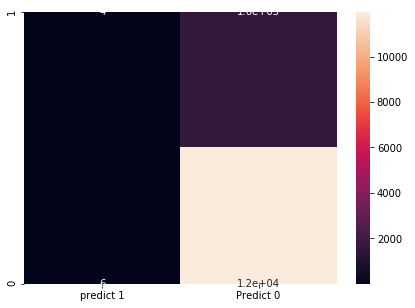

Confusion Matrix for SVC Model
[[    4  1595]
 [    6 11959]]


In [52]:
SVC_CM = metrics.confusion_matrix(y_test,SVC_test_predict,labels=[1,0])
cm = pd.DataFrame(SVC_CM,index = (i for i in ["1","0"]),
                     columns = (i for i in ["predict 1", "Predict 0"]))

plt.figure(figsize = (7,5))
sns.heatmap(cm,annot=True)
plt.show()
print("Confusion Matrix for SVC Model")
print(SVC_CM)

### e.Decision Tree Classifier

In [53]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state = 1)
dTree.fit(X_train,y_train)

print("DT model Train Accuracy: {0:.4f}".format(dTree.score(X_train,y_train)))
print("DT model Test Accuracy: {0:.4f}".format(dTree.score(X_test,y_test)))
print("<====================================================>")

DT_test_predict = dTree.predict(X_test)
print(metrics.classification_report(y_test,DT_test_predict))

DT model Train Accuracy: 1.0000
DT model Test Accuracy: 0.8361
<====================================================>
              precision    recall  f1-score   support

           0       0.91      0.90      0.91     11965
           1       0.32      0.33      0.32      1599

    accuracy                           0.84     13564
   macro avg       0.61      0.62      0.62     13564
weighted avg       0.84      0.84      0.84     13564



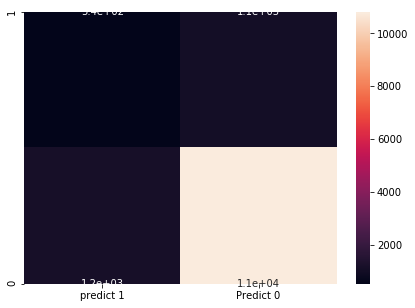

Confusion Matrix for Decision Tree Model
[[  535  1064]
 [ 1159 10806]]


In [54]:
dTree_CM = metrics.confusion_matrix(y_test,DT_test_predict,labels=[1,0])
cm = pd.DataFrame(dTree_CM,index = (i for i in ["1","0"]),
                     columns = (i for i in ["predict 1", "Predict 0"]))

plt.figure(figsize = (7,5))
sns.heatmap(cm,annot=True)
plt.show()
print("Confusion Matrix for Decision Tree Model")
print(dTree_CM)

In [55]:
print("<====================================================>")
print("Linear Model")
# Classification report of Linear model
print(metrics.classification_report(y_test,LR_predicted))
print("<====================================================>")
print("KNN Model")
print(metrics.classification_report(y_test,KNN_predicted))
print("<====================================================>")
print("Naive Bayes Model")
print(metrics.classification_report(y_test,NB_test_predict))
print("<====================================================>")
print("SVC Model")
print(metrics.classification_report(y_test,SVC_test_predict))
print("<====================================================>")
print("Decision Tree Model")
print(metrics.classification_report(y_test,DT_test_predict))

<====================================================>
Linear Model
              precision    recall  f1-score   support

           0       0.90      0.99      0.94     11965
           1       0.62      0.13      0.22      1599

    accuracy                           0.89     13564
   macro avg       0.76      0.56      0.58     13564
weighted avg       0.86      0.89      0.86     13564

<====================================================>
KNN Model
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     11965
           1       0.54      0.08      0.14      1599

    accuracy                           0.88     13564
   macro avg       0.72      0.54      0.54     13564
weighted avg       0.85      0.88      0.84     13564

<====================================================>
Naive Bayes Model
              precision    recall  f1-score   support

           0       0.91      0.84      0.88     11965
           1       0.25      0.

The Precsion for Target value 1 is better for Linear and KNN model and recall for all the models for target value 1 is very less too. 
Accuracy for Linear, KNN and SVC seems to be good when compared to other models and it is above 85%.
- Logistic model has very good precision and recal for the target value 0 but very less for the target value 1.
- knn model has almost same value on precision and recal for value 0 but it falls behind for value 1
- Naive bayes has better values when compared to both the logistic and KNN.
- SVC performace is good on precision but recall of target value 0 is very less
- decision tree is really better while compared to all the above model. 

## 6. Ensemble Techniques 

### Adaptive Boosting Classifirer
#### Logistic Regression AdaBoosting Model

In [56]:
ABC_LR = AdaBoostClassifier(base_estimator = LogisticRegression(),n_estimators = 50,random_state = 1)
ABC_LR = ABC_LR.fit(X_train,y_train)

print("AdaBoosting Logistic Regression model Train Accuracy: {0:.4f}".format(ABC_LR.score(X_train,y_train)))
print("AdaBoosting Logistic Regression model Test Accuracy: {0:.4f}".format(ABC_LR.score(X_test,y_test)))
print("<==========================================================================>")

ABC_LR_y_predict = ABC_LR.predict(X_test)
print(classification_report(y_test,ABC_LR_y_predict))

AdaBoosting Logistic Regression model Train Accuracy: 0.8882
AdaBoosting Logistic Regression model Test Accuracy: 0.8877
<==========================================================================>
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     11965
           1       0.62      0.13      0.21      1599

    accuracy                           0.89     13564
   macro avg       0.76      0.56      0.57     13564
weighted avg       0.86      0.89      0.85     13564



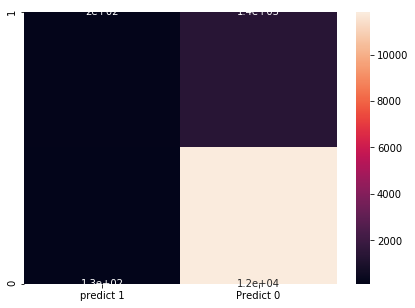

Confusion Matrix for Logistic Regression AdaBoosting Model
[[  202  1397]
 [  126 11839]]


In [57]:
ABC_LR_CM = metrics.confusion_matrix(y_test,ABC_LR_y_predict,labels=[1,0])
cm = pd.DataFrame(ABC_LR_CM,index = (i for i in ["1","0"]),
                     columns = (i for i in ["predict 1", "Predict 0"]))

plt.figure(figsize = (7,5))
sns.heatmap(cm,annot=True)
plt.show()
print("Confusion Matrix for Logistic Regression AdaBoosting Model")
print(ABC_LR_CM)

##### The Logistic Regression Model and adaptive Boosting Logistic Model has no difference in performance wise
The same outcome can be acheived with a simple logistic model hence boosting the model is computationally expensive and we can avoid this model. It is not better than the base model. This model is ovefits. This happens because linear mdoel are similar so the performance dosent increase.

#### Naive Bayess AdaBoosting Model

In [58]:
ABC_NB = AdaBoostClassifier(base_estimator = GaussianNB(),n_estimators = 50,random_state = 5)
ABC_NB = ABC_NB.fit(X_train,y_train)

print("AdaBoosting Naive Bayes model Train Accuracy: {0:.4f}".format(ABC_NB.score(X_train,y_train)))
print("AdaBoosting Naive Bayes model Test Accuracy: {0:.4f}".format(ABC_NB.score(X_test,y_test)))
print("<===================================================>")

ABC_NB_predict = ABC_NB.predict(X_test)
print(classification_report(y_test,ABC_NB_predict))

AdaBoosting Naive Bayes model Train Accuracy: 0.6646
AdaBoosting Naive Bayes model Test Accuracy: 0.6630
<===================================================>
              precision    recall  f1-score   support

           0       0.90      0.69      0.78     11965
           1       0.16      0.43      0.23      1599

    accuracy                           0.66     13564
   macro avg       0.53      0.56      0.51     13564
weighted avg       0.81      0.66      0.72     13564



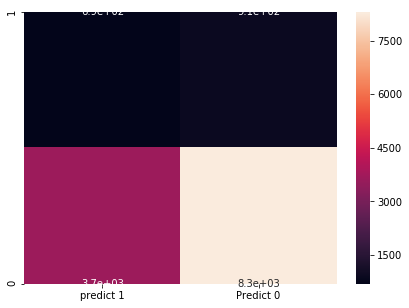

Confusion Matrix for Naive Bayes AdaBoosting Model
[[ 688  911]
 [3660 8305]]


In [59]:
ABC_NB_CM = metrics.confusion_matrix(y_test,ABC_NB_predict,labels=[1,0])
cm = pd.DataFrame(ABC_NB_CM,index = (i for i in ["1","0"]),
                     columns = (i for i in ["predict 1", "Predict 0"]))

plt.figure(figsize = (7,5))
sns.heatmap(cm,annot=True)
plt.show()
print("Confusion Matrix for Naive Bayes AdaBoosting Model")
print(ABC_NB_CM)

Naive Bayes model is little bit underperforming than the base model. It looks like stable model as it is without boosting it and after boosting there is not much difference in the performance.

#### Decision Tree AdaBoosting model

In [60]:
ABC_DT = AdaBoostClassifier(n_estimators = 10, random_state = 5)
ABC_DT = ABC_DT.fit(X_train, y_train)

print("AdaBoosting Decision Tree model Train Accuracy: {0:.4f}".format(ABC_DT.score(X_train,y_train)))
print("AdaBoosting Decision Tree model Test Accuracy: {0:.4f}".format(ABC_DT.score(X_test,y_test)))
print("<===================================================>")

ABC_DT_predict = ABC_DT.predict(X_test)
print(classification_report(y_test,ABC_DT_predict))

AdaBoosting Decision Tree model Train Accuracy: 0.8928
AdaBoosting Decision Tree model Test Accuracy: 0.8927
<===================================================>
              precision    recall  f1-score   support

           0       0.90      0.99      0.94     11965
           1       0.66      0.19      0.29      1599

    accuracy                           0.89     13564
   macro avg       0.78      0.59      0.62     13564
weighted avg       0.87      0.89      0.87     13564



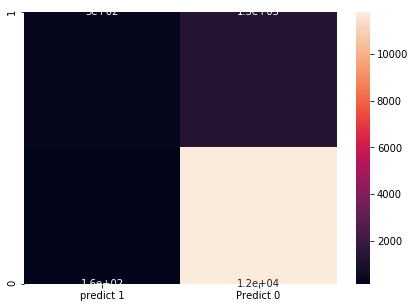

Confusion Matrix for Decision Tree AdaBoosting Model
[[  303  1296]
 [  159 11806]]


In [61]:
ABC_DT_CM = metrics.confusion_matrix(y_test,ABC_DT_predict,labels=[1,0])
cm = pd.DataFrame(ABC_DT_CM,index = (i for i in ["1","0"]),
                     columns = (i for i in ["predict 1", "Predict 0"]))

plt.figure(figsize = (7,5))
sns.heatmap(cm,annot=True)
plt.show()
print("Confusion Matrix for Decision Tree AdaBoosting Model")
print(ABC_DT_CM)

We can see a good increase in the precision of the value 1 in this model.

#### Decision Tree Classifier with pruned tree in AdaBoosting Model

In [62]:
ABC_DTP = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(criterion = "entropy", max_depth = 17, random_state = 10), n_estimators = 3, random_state = 5)
ABC_DTP = ABC_DTP.fit(X_train, y_train)

print("AdaBoosting Decision Tree(pruned) model Train Accuracy: {0:.4f}".format(ABC_DTP.score(X_train,y_train)))
print("AdaBoosting Decision Tree(pruned) model Test Accuracy: {0:.4f}".format(ABC_DTP.score(X_test,y_test)))
print("<===================================================>")

ABC_DTP_predict = ABC_DTP.predict(X_test)
print(classification_report(y_test,ABC_DTP_predict))

AdaBoosting Decision Tree(pruned) model Train Accuracy: 0.9809
AdaBoosting Decision Tree(pruned) model Test Accuracy: 0.8574
<===================================================>
              precision    recall  f1-score   support

           0       0.91      0.94      0.92     11965
           1       0.36      0.28      0.31      1599

    accuracy                           0.86     13564
   macro avg       0.63      0.61      0.62     13564
weighted avg       0.84      0.86      0.85     13564



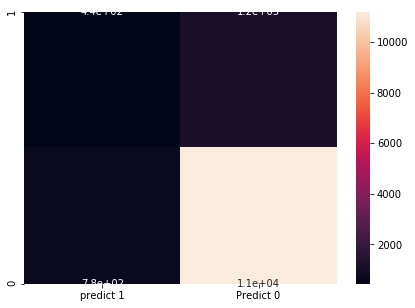

Confusion Matrix for Decison Tree(pruned) AdaBoosting Model
[[  442  1157]
 [  777 11188]]


In [63]:
ABC_DTP_CM = metrics.confusion_matrix(y_test,ABC_DTP_predict,labels=[1,0])
cm = pd.DataFrame(ABC_DTP_CM,index = (i for i in ["1","0"]),
                     columns = (i for i in ["predict 1", "Predict 0"]))

plt.figure(figsize = (7,5))
sns.heatmap(cm,annot=True)
plt.show()
print("Confusion Matrix for Decison Tree(pruned) AdaBoosting Model")
print(ABC_DTP_CM)

pruning the tree seems to bring it close to the actual model. so it is better with default boosting

##### over all in the boosting the simple boosted decision tree is better than other model.
- SVC algorithm is not implemented in boosting since SVM is a very powerful algorithm. Boosting is used to combine simple algorithm to create a powerful model. so this criteria is not satisfied for SVC.
- knn cant be used as a base model since boosting uses weighted samples

### Bagging Classifier
#### Logistic Regression Bagging model

In [64]:
Bag_LR = BaggingClassifier(base_estimator = LogisticRegression() ,n_estimators = 80,random_state = 5)
Bag_LR = Bag_LR.fit(X_train,y_train)


print("Logistic Regression Bagging model Train Accuracy: {0:.4f}".format(Bag_LR.score(X_train,y_train)))
print("Logistic Regression Bagging model Test Accuracy: {0:.4f}".format(Bag_LR.score(X_test,y_test)))
print("<===================================================>")

Bag_LR_predict = Bag_LR.predict(X_test)
print(metrics.classification_report(y_test,Bag_LR_predict))

Logistic Regression Bagging model Train Accuracy: 0.8890
Logistic Regression Bagging model Test Accuracy: 0.8876
<===================================================>
              precision    recall  f1-score   support

           0       0.90      0.99      0.94     11965
           1       0.61      0.13      0.22      1599

    accuracy                           0.89     13564
   macro avg       0.75      0.56      0.58     13564
weighted avg       0.86      0.89      0.85     13564



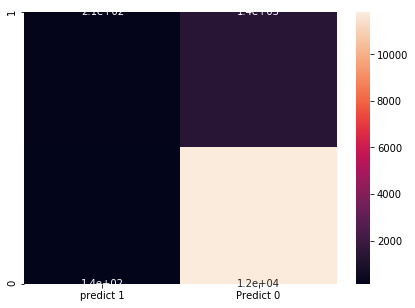

Confusion Matrix for Logistic Regression Bagging Model
[[  214  1385]
 [  139 11826]]


In [65]:
Bag_LR_CM = metrics.confusion_matrix(y_test,Bag_LR_predict,labels=[1,0])
cm = pd.DataFrame(Bag_LR_CM,index = (i for i in ["1","0"]),
                     columns = (i for i in ["predict 1", "Predict 0"]))

plt.figure(figsize = (7,5))
sns.heatmap(cm,annot=True)
plt.show()
print("Confusion Matrix for Logistic Regression Bagging Model")
print(Bag_LR_CM)

Just like boosting Bagging a logistic model is not performing any better than base model. The reason is logitic regression are stable model.

#### KNN Bagging model

In [66]:
Bag_KNN = BaggingClassifier(base_estimator = KNeighborsClassifier(n_neighbors = 5, weights = 'distance') ,n_estimators = 80,random_state = 5)
Bag_KNN = Bag_LR.fit(X_train,y_train)

print("KNN Bagging model Train Accuracy: {0:.4f}".format(Bag_KNN.score(X_train,y_train)))
print("KNN Bagging model Test Accuracy: {0:.4f}".format(Bag_KNN.score(X_test,y_test)))
print("<===================================================>")

Bag_KNN_predict = Bag_KNN.predict(X_test)
print(metrics.classification_report(y_test,Bag_KNN_predict))

KNN Bagging model Train Accuracy: 0.8890
KNN Bagging model Test Accuracy: 0.8876
<===================================================>
              precision    recall  f1-score   support

           0       0.90      0.99      0.94     11965
           1       0.61      0.13      0.22      1599

    accuracy                           0.89     13564
   macro avg       0.75      0.56      0.58     13564
weighted avg       0.86      0.89      0.85     13564



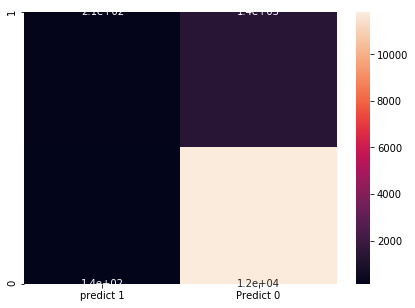

Confusion Matrix for KNN Bagging Model
[[  214  1385]
 [  139 11826]]


In [67]:
Bag_KNN_CM = metrics.confusion_matrix(y_test,Bag_KNN_predict,labels=[1,0])
cm = pd.DataFrame(Bag_KNN_CM,index = (i for i in ["1","0"]),
                     columns = (i for i in ["predict 1", "Predict 0"]))

plt.figure(figsize = (7,5))
sns.heatmap(cm,annot=True)
plt.show()
print("Confusion Matrix for KNN Bagging Model")
print(Bag_KNN_CM)

- bagging KNN is computationaly expensive since the distance of each data point is calculated and the data has huge number of records. The Target value is unevenly distributed as 0 has very high number of records compared to 1.
- it gives a slightly better performance than the base model for the target value 1 but still this model is not acceptable when we look at the expensive computation performed over a very small change in the outcome

#### Naive Bayes Bagging model

In [68]:
Bag_NB = BaggingClassifier(base_estimator = GaussianNB() ,n_estimators = 80,random_state = 5)
Bag_NB = Bag_NB.fit(X_train,y_train)

print("Naive Bayes Bagging model Train Accuracy: {0:.4f}".format(Bag_NB.score(X_train,y_train)))
print("Naive Bayes Bagging model Test Accuracy: {0:.4f}".format(Bag_NB.score(X_test,y_test)))
print("<===================================================>")

Bag_NB_predict = Bag_NB.predict(X_test)
print(metrics.classification_report(y_test,Bag_NB_predict))

Naive Bayes Bagging model Train Accuracy: 0.7913
Naive Bayes Bagging model Test Accuracy: 0.7902
<===================================================>
              precision    recall  f1-score   support

           0       0.91      0.84      0.88     11965
           1       0.25      0.39      0.30      1599

    accuracy                           0.79     13564
   macro avg       0.58      0.62      0.59     13564
weighted avg       0.83      0.79      0.81     13564



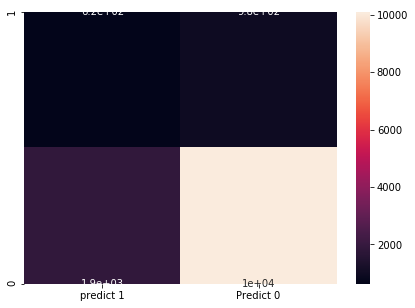

Confusion Matrix for Naive Bayes Bagging Model
[[  624   975]
 [ 1871 10094]]


In [69]:
Bag_NB_CM = metrics.confusion_matrix(y_test,Bag_NB_predict,labels=[1,0])
cm = pd.DataFrame(Bag_NB_CM,index = (i for i in ["1","0"]),
                     columns = (i for i in ["predict 1", "Predict 0"]))

plt.figure(figsize = (7,5))
sns.heatmap(cm,annot=True)
plt.show()
print("Confusion Matrix for Naive Bayes Bagging Model")
print(Bag_NB_CM)

- There is no imporovement in the performance of the bagging naive bayess when we compare it to the base model. 

#### SVC Bagging model

In [71]:
#from sklearn.ensemble import BaggingClassifier
Bag_SVC = BaggingClassifier(base_estimator = SVC(gamma = 0.00001, C = 10) ,n_estimators = 80,random_state = 5)
Bag_SVC = Bag_SVC.fit(X_train,y_train)

print("Bagging SVC model Train Accuracy: {0:.4f}".format(Bag_SVC.score(X_train,y_train)))
print("Bagging SVC model Test Accuracy: {0:.4f}".format(Bag_SVC.score(X_test,y_test)))
print("<===================================================>")

Bag_SVC_predict = Bag_SVC.predict(X_test)
print(metrics.classification_report(y_test,Bag_SVC_predict))

Bagging SVC model Train Accuracy: 0.8834
Bagging SVC model Test Accuracy: 0.8821
<===================================================>
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     11965
           1       0.00      0.00      0.00      1599

    accuracy                           0.88     13564
   macro avg       0.44      0.50      0.47     13564
weighted avg       0.78      0.88      0.83     13564



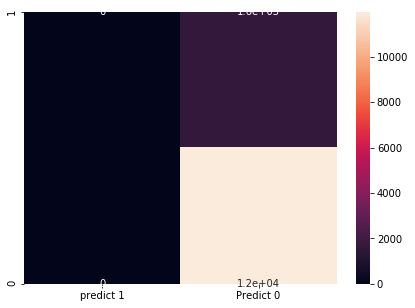

Confusion Matrix for SVC Bagging Model
[[    0  1599]
 [    0 11965]]


In [72]:
Bag_SVC_CM = metrics.confusion_matrix(y_test,Bag_SVC_predict,labels=[1,0])
cm = pd.DataFrame(Bag_SVC_CM,index = (i for i in ["1","0"]),
                     columns = (i for i in ["predict 1", "Predict 0"]))

plt.figure(figsize = (7,5))
sns.heatmap(cm,annot=True)
plt.show()
print("Confusion Matrix for SVC Bagging Model")
print(Bag_SVC_CM)

- It can be noticed that the target varibale 1 has completely lost its previous score in the base model
- This model is very heavy and time consuming.
- The outcome is the decreased performance for the time it has take. This model is completely unsuitable.

#### Decision Tree Bagging Model

In [74]:
Bag_DT = BaggingClassifier(n_estimators = 80, random_state = 5)
Bat_DT = Bag_DT.fit(X_train, y_train)

print("Bagging Decision Tree Bagging model Train Accuracy: {0:.4f}".format(Bag_DT.score(X_train,y_train)))
print("Bagging Decision Tree Bagging model Test Accuracy: {0:.4f}".format(Bag_DT.score(X_test,y_test)))
print("<===================================================>")

Bag_DT_predict = Bag_DT.predict(X_test)
print(metrics.classification_report(y_test,Bag_DT_predict))

Bagging Decision Tree Bagging model Train Accuracy: 0.9999
Bagging Decision Tree Bagging model Test Accuracy: 0.8874
<===================================================>
              precision    recall  f1-score   support

           0       0.91      0.97      0.94     11965
           1       0.55      0.24      0.33      1599

    accuracy                           0.89     13564
   macro avg       0.73      0.61      0.64     13564
weighted avg       0.86      0.89      0.87     13564



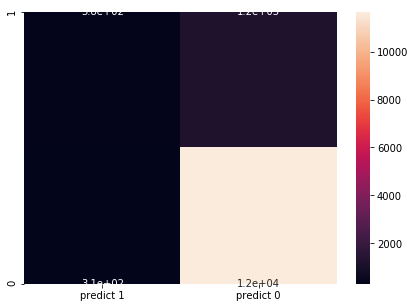

Confusion Matrix for Decision Tree Bagging Model
[[  383  1216]
 [  311 11654]]


In [75]:
Bag_DT_CM = metrics.confusion_matrix(y_test,Bag_DT_predict,labels=[1,0])
cm = pd.DataFrame(Bag_DT_CM, index = (i for i in ["1","0"]),
                 columns = (i for i in ["predict 1", "predict 0"]))

plt.figure(figsize = (7,5))
sns.heatmap(cm,annot = True)
plt.show()
print("Confusion Matrix for Decision Tree Bagging Model")
print(Bag_DT_CM)

- There is a slight drop in recall of target value 1. But there is a good improvement on the precision.
- There is an increase in the recall of target value 0. 
- There is improvement in accuracy of the model too.

##### Pruned DT Bagging

In [76]:
Bag_DTP = BaggingClassifier(base_estimator = DecisionTreeClassifier(criterion = "entropy", max_depth = 20, random_state = 10), n_estimators = 80, random_state = 5)
Bag_DTP = Bag_DTP.fit(X_train, y_train)

print("Decision Tree(Pruned) Bagging model Train Accuracy: {0:.4f}".format(Bag_DTP.score(X_train, y_train)))
print("Desicion Tree(Pruned) Bagging  model Test Accuracy: {0:.4f}".format(Bag_DTP.score(X_test,y_test)))
print("<===================================================>")

Bag_DTP_predict = Bag_DTP.predict(X_test)
print(metrics.classification_report(y_test,Bag_DTP_predict))

Decision Tree(Pruned) Bagging model Train Accuracy: 0.9686
Desicion Tree(Pruned) Bagging  model Test Accuracy: 0.8890
<===================================================>
              precision    recall  f1-score   support

           0       0.91      0.98      0.94     11965
           1       0.57      0.24      0.34      1599

    accuracy                           0.89     13564
   macro avg       0.74      0.61      0.64     13564
weighted avg       0.87      0.89      0.87     13564



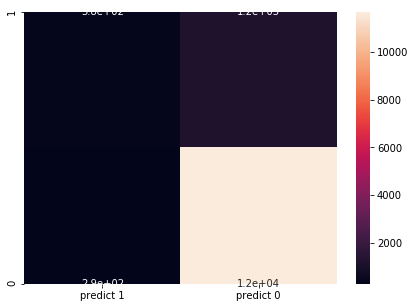

Confusion Matrix for DEcision Tree(pruned) Bagging Model
[[  383  1216]
 [  290 11675]]


In [77]:
Bag_DTP_CM = metrics.confusion_matrix(y_test,Bag_DTP_predict, labels = [1,0])
cm = pd.DataFrame(Bag_DTP_CM, index = (i for i in ["1","0"]),
                 columns = (i for i in ["predict 1", "predict 0"]))

plt.figure(figsize = (7,5))
sns.heatmap(cm,annot = True)
plt.show()
print("Confusion Matrix for DEcision Tree(pruned) Bagging Model")
print(Bag_DTP_CM)

- After prunning There is an improvement in precision of the target value 1. 
- Recall of target value 0 is also improved slightly.

### Random Forest Classifier

In [79]:
RFC1 = RandomForestClassifier(n_estimators = 75,random_state = 5,max_depth = 20, max_features = 10)
RFC1 = RFC1.fit(X_train,y_train)

print("Random Forest classifier model Train Accuracy: {0:.4f}".format(RFC1.score(X_train,y_train)))
print("Random Forest classifier model Train Accuracy: {0:.4f}".format(RFC1.score(X_test,y_test)))
print("<===================================================>")

RFC_y_predict = RFC1.predict(X_test)
print(metrics.classification_report(y_test,RFC_y_predict))

Random Forest classifier model Train Accuracy: 0.9720
Random Forest classifier model Train Accuracy: 0.8908
<===================================================>
              precision    recall  f1-score   support

           0       0.91      0.98      0.94     11965
           1       0.59      0.24      0.34      1599

    accuracy                           0.89     13564
   macro avg       0.75      0.61      0.64     13564
weighted avg       0.87      0.89      0.87     13564



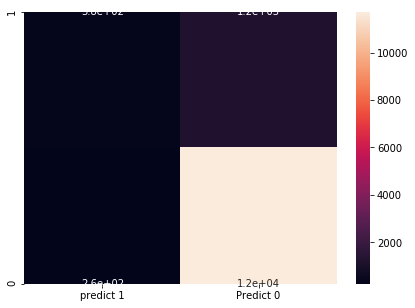

Confusion Matrix for Random Forest classifier Model


array([[  376,  1223],
       [  258, 11707]], dtype=int64)

In [80]:
RFC_CM = metrics.confusion_matrix(y_test,RFC_y_predict,labels=[1,0])
cm = pd.DataFrame(RFC_CM,index = (i for i in ["1","0"]),
                     columns = (i for i in ["predict 1", "Predict 0"]))


plt.figure(figsize = (7,5))
sns.heatmap(cm,annot=True)
plt.show()

print("Confusion Matrix for Random Forest classifier Model")
RFC_CM

- Accuracy is increased from all the other models and even better than decision tree model
- Precision of the target value is increased from the other models. 
- This model is much better than all the other model.

### Comparing all the models

#### Linear Model

In [83]:
print("Logistic Base Model")
print(metrics.classification_report(y_test,LR_predicted))
print("Logistic Adaboosting Model")
print(classification_report(y_test,ABC_LR_y_predict))
print("Logistic Bagging Model")
print(metrics.classification_report(y_test,Bag_LR_predict))

Logistic Base Model
              precision    recall  f1-score   support

           0       0.90      0.99      0.94     11965
           1       0.62      0.13      0.22      1599

    accuracy                           0.89     13564
   macro avg       0.76      0.56      0.58     13564
weighted avg       0.86      0.89      0.86     13564

Logistic Adaboosting Model
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     11965
           1       0.62      0.13      0.21      1599

    accuracy                           0.89     13564
   macro avg       0.76      0.56      0.57     13564
weighted avg       0.86      0.89      0.85     13564

Logistic Bagging Model
              precision    recall  f1-score   support

           0       0.90      0.99      0.94     11965
           1       0.61      0.13      0.22      1599

    accuracy                           0.89     13564
   macro avg       0.75      0.56      0.58     13564
weig

There is no imporvement from the losgitic models. 

#### KNN Model

In [84]:
print("KNN Base Model")
print(metrics.classification_report(y_test,KNN_predicted))
print("KNN Bagging Model")
print(metrics.classification_report(y_test,Bag_KNN_predict))

KNN Base Model
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     11965
           1       0.54      0.08      0.14      1599

    accuracy                           0.88     13564
   macro avg       0.72      0.54      0.54     13564
weighted avg       0.85      0.88      0.84     13564

KNN Bagging Model
              precision    recall  f1-score   support

           0       0.90      0.99      0.94     11965
           1       0.61      0.13      0.22      1599

    accuracy                           0.89     13564
   macro avg       0.75      0.56      0.58     13564
weighted avg       0.86      0.89      0.85     13564



There is a slight improvement for the Bagging KNN model but it is still not suitable.

#### Naive Bayes

In [85]:
print("Naive Bayes Base Model")
print(metrics.classification_report(y_test,NB_test_predict))
print("Naive Bayes AdaBoosting Model")
print(metrics.classification_report(y_test,ABC_NB_predict))
print("Naive Bayes Bagging Model")
print(metrics.classification_report(y_test,Bag_NB_predict))

Naive Bayes Base Model
              precision    recall  f1-score   support

           0       0.91      0.84      0.88     11965
           1       0.25      0.39      0.30      1599

    accuracy                           0.79     13564
   macro avg       0.58      0.62      0.59     13564
weighted avg       0.83      0.79      0.81     13564

Naive Bayes AdaBoosting Model
              precision    recall  f1-score   support

           0       0.90      0.69      0.78     11965
           1       0.16      0.43      0.23      1599

    accuracy                           0.66     13564
   macro avg       0.53      0.56      0.51     13564
weighted avg       0.81      0.66      0.72     13564

Naive Bayes Bagging Model
              precision    recall  f1-score   support

           0       0.91      0.84      0.88     11965
           1       0.25      0.39      0.30      1599

    accuracy                           0.79     13564
   macro avg       0.58      0.62      0.59     1

- The precision of the Target Vaule 1 is very less and it is even less for Adaptive boosting model.
- recall is droping in the adaptive boosting model for the target value 0 .
- This model is unsuitable

#### SVC

In [86]:
print("SVC Base Model")
print(metrics.classification_report(y_test,SVC_test_predict))
print("SVC Bagging Model")
print(metrics.classification_report(y_test,Bag_SVC_predict))

SVC Base Model
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     11965
           1       0.40      0.00      0.00      1599

    accuracy                           0.88     13564
   macro avg       0.64      0.50      0.47     13564
weighted avg       0.83      0.88      0.83     13564

SVC Bagging Model
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     11965
           1       0.00      0.00      0.00      1599

    accuracy                           0.88     13564
   macro avg       0.44      0.50      0.47     13564
weighted avg       0.78      0.88      0.83     13564



- precision of the target value seems to drop completly for the bagging svc model.
- recal seems to be very bad for both SVC models
- Computationall very expensive for the poor output

#### Decision Tree

In [87]:
print("Decision Tree Base Model")
print(metrics.classification_report(y_test,DT_test_predict))
print("Decision Tree AdaBoosting Model")
print(metrics.classification_report(y_test,ABC_DT_predict))
print("Decision Tree Bagging Model")
print(metrics.classification_report(y_test,Bag_DT_predict))

Decision Tree Base Model
              precision    recall  f1-score   support

           0       0.91      0.90      0.91     11965
           1       0.32      0.33      0.32      1599

    accuracy                           0.84     13564
   macro avg       0.61      0.62      0.62     13564
weighted avg       0.84      0.84      0.84     13564

Decision Tree AdaBoosting Model
              precision    recall  f1-score   support

           0       0.90      0.99      0.94     11965
           1       0.66      0.19      0.29      1599

    accuracy                           0.89     13564
   macro avg       0.78      0.59      0.62     13564
weighted avg       0.87      0.89      0.87     13564

Decision Tree Bagging Model
              precision    recall  f1-score   support

           0       0.91      0.97      0.94     11965
           1       0.55      0.24      0.33      1599

    accuracy                           0.89     13564
   macro avg       0.73      0.61      0.64

- Adaboosting Model shows good improvement on recall of the target value 0 and same for the bagging model which is better than bas but little lower than the boosting model.
- precison of target value 1 is much more improved in boosting and bagging model but its better for boosting which shows double improvement from the base model. But recal drops too for both boosting and bagging.
- For this decision Tree the Adabosting model is much more suitable than the rest of the models.

#### Decision Tree pruned

In [88]:
print("Decision Tree(pruned) AdaBoosting Model")
print(classification_report(y_test,ABC_DTP_predict))
print("Decision Tree(pruned) Bagging Model")
print(metrics.classification_report(y_test,Bag_DTP_predict))

Decision Tree(pruned) AdaBoosting Model
              precision    recall  f1-score   support

           0       0.91      0.94      0.92     11965
           1       0.36      0.28      0.31      1599

    accuracy                           0.86     13564
   macro avg       0.63      0.61      0.62     13564
weighted avg       0.84      0.86      0.85     13564

Decision Tree(pruned) Bagging Model
              precision    recall  f1-score   support

           0       0.91      0.98      0.94     11965
           1       0.57      0.24      0.34      1599

    accuracy                           0.89     13564
   macro avg       0.74      0.61      0.64     13564
weighted avg       0.87      0.89      0.87     13564



- pruned Decsion tree performs better than defauld decsion trees.
- precision of the bagging model is better than the boosting model for the target value 1.
- recall for the target value 0 is better for the bagging model.

#### Random Forest Classifier

In [89]:
print("Random Forest Classifier")
print(metrics.classification_report(y_test,RFC_y_predict))

Random Forest Classifier
              precision    recall  f1-score   support

           0       0.91      0.98      0.94     11965
           1       0.59      0.24      0.34      1599

    accuracy                           0.89     13564
   macro avg       0.75      0.61      0.64     13564
weighted avg       0.87      0.89      0.87     13564



This model outperforms all the other models and is best suited for the problem among all the above models

### Final Model Selected

In [90]:
print(" The best model which can be picked up from all the above models is Random Forest Classifier model")
print(metrics.classification_report(y_test,RFC_y_predict))
RFC1

 The best model which can be picked up from all the above models is Random Forest Classifier model
              precision    recall  f1-score   support

           0       0.91      0.98      0.94     11965
           1       0.59      0.24      0.34      1599

    accuracy                           0.89     13564
   macro avg       0.75      0.61      0.64     13564
weighted avg       0.87      0.89      0.87     13564



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=20, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=75,
                       n_jobs=None, oob_score=False, random_state=5, verbose=0,
                       warm_start=False)

##### From all the above models the model best suited is Random forest classifier with Max depth 20. 